In [14]:
import numpy as np
import paper_data

from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.geometry.regular_lattice_2d import RegularLattice2D
from qubit_system.qubit_system_classes import StaticQubitSystem, EvolvingQubitSystem
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation
from qubit_system.utils.states import get_ghz_state, GHZStateType


2-qubit system.

Solid lines show energy levels when $\Omega = 0$,
dotted lines show energy eigenvalues when $\Omega = 1$.


100%|██████████| 50/50 [00:00<00:00, 183.62it/s]


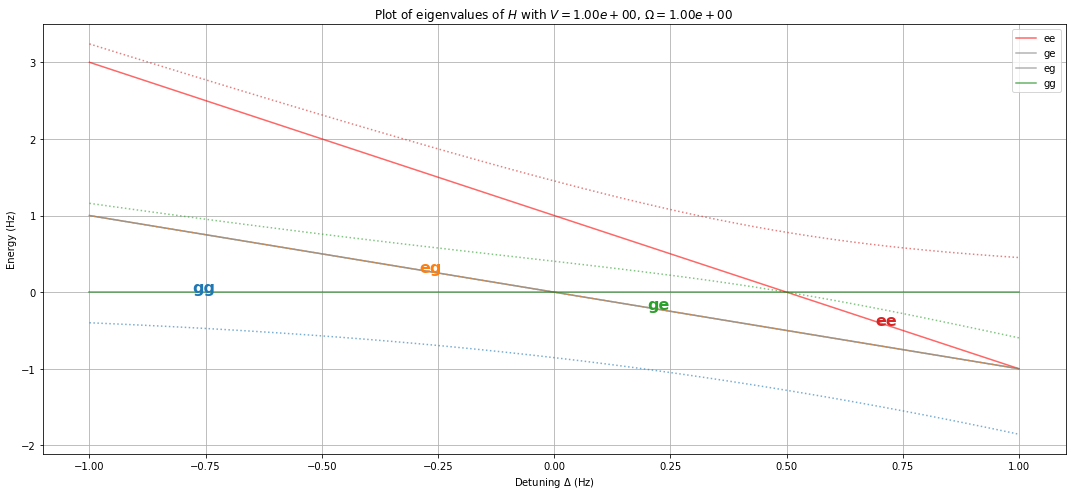

In [3]:
s_qs = StaticQubitSystem(
    N=2, V=1,
    geometry=RegularLattice1D(),
    Omega=1, Delta=np.linspace(-1, 1, 50)
)
s_qs.plot()


4-qubit systems.

First plot shows 1D lattice,
second plot shows 2D lattice of shape (2, 2).


100%|██████████| 50/50 [00:00<00:00, 62.70it/s]


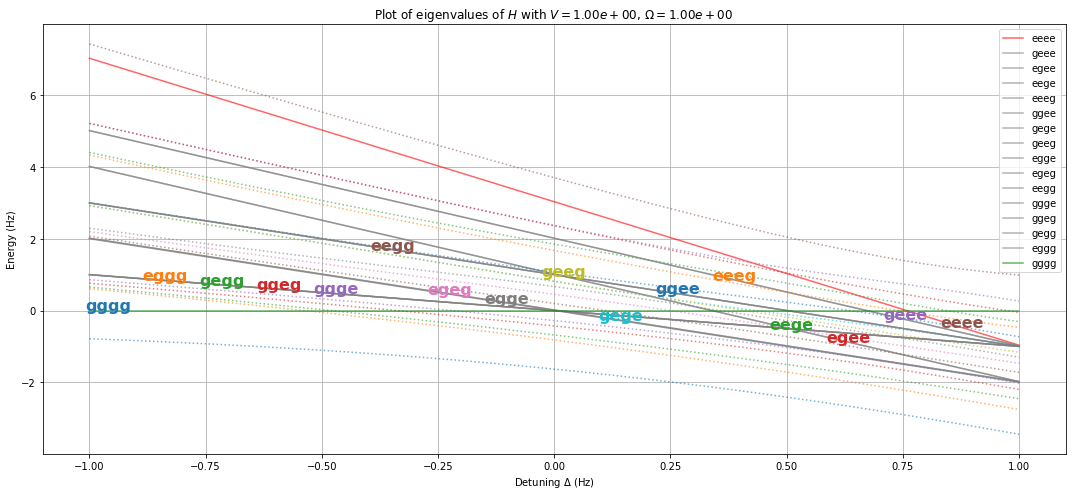

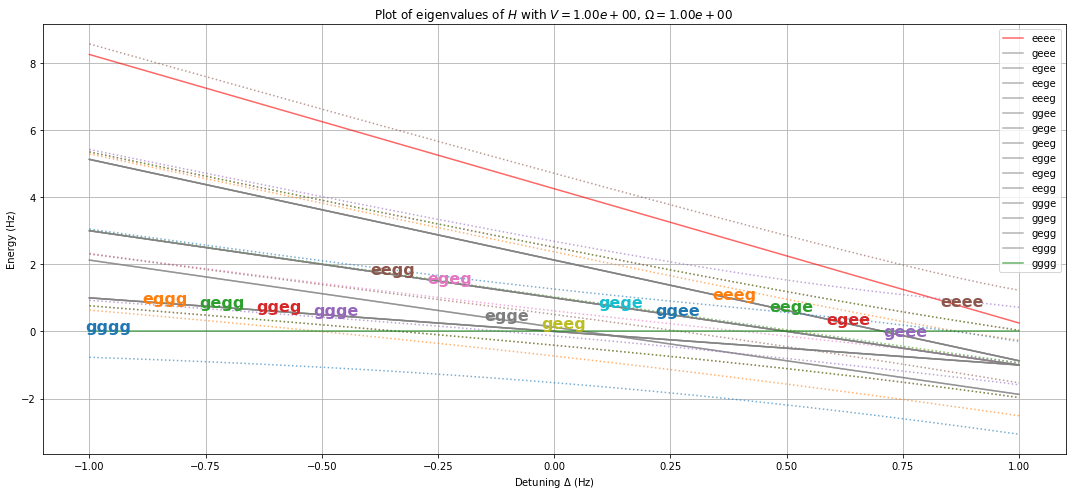

In [5]:
s_qs_1d = StaticQubitSystem(
    N=4, V=1,
    geometry=RegularLattice1D(),
    Omega=1, Delta=np.linspace(-1, 1, 50)
)
s_qs_1d.plot()

s_qs_2d = StaticQubitSystem(
    N=4, V=1,
    geometry=RegularLattice2D((2, 2)),
    Omega=1, Delta=np.linspace(-1, 1, 50)
)
s_qs_2d.plot()


Evolving 2-qubit system.

State evolution with simple functions for $\Omega$ and $\Delta$.


no collapse operator, using sesolve


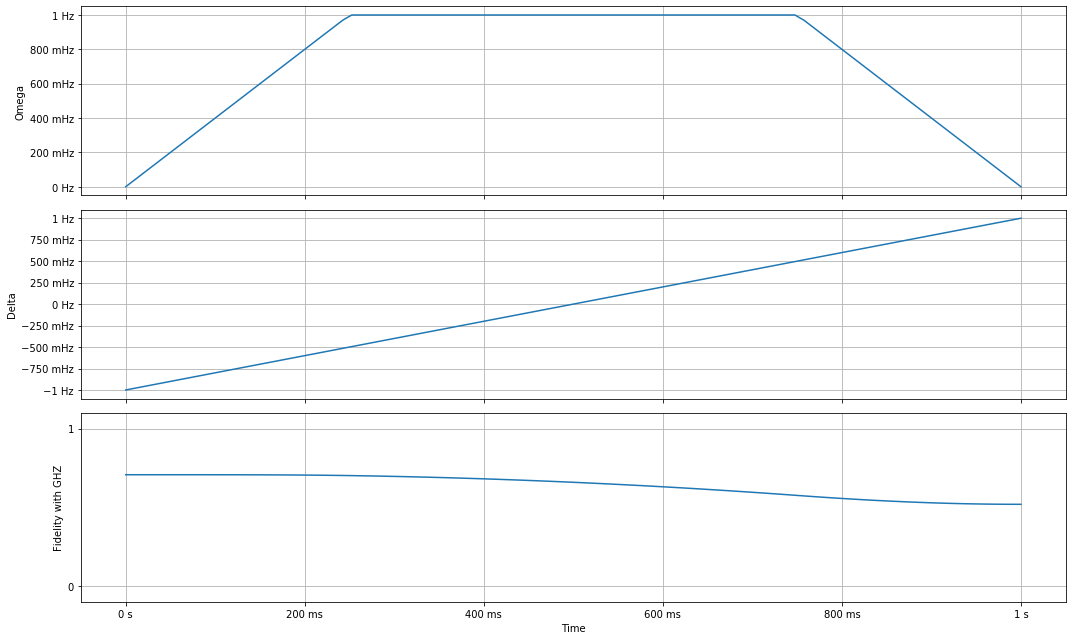

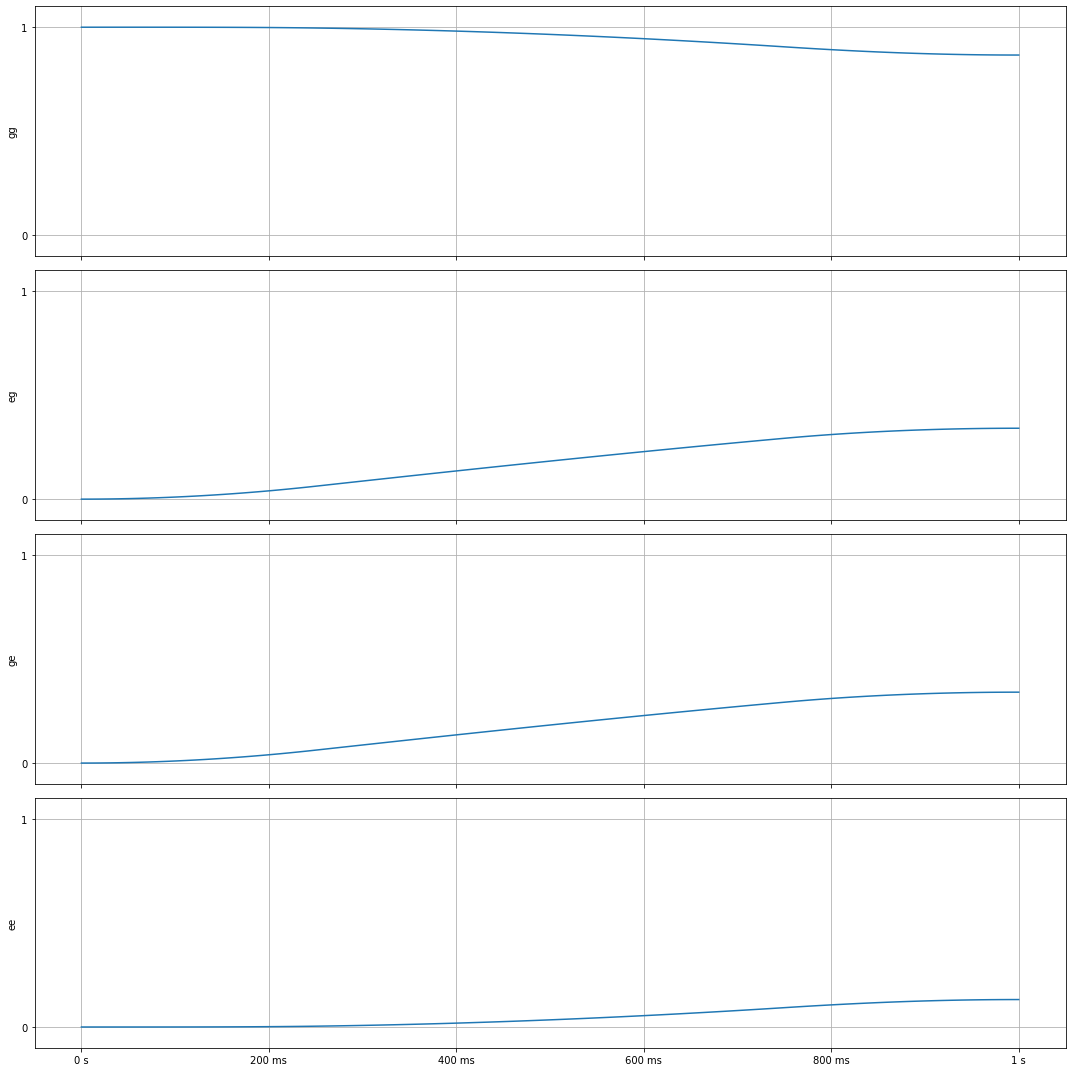

In [7]:
t = 1
N = 2
e_qs = EvolvingQubitSystem(
    N=N, V=1, geometry=RegularLattice1D(),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 4, t * 3 / 4, t], [0, 1, 1, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [-1, 1]),
    t_list=np.linspace(0, 1, 100),
    ghz_state=get_ghz_state(N)
)
e_qs.solve()
e_qs.plot()


Evolving 2-qubit system.

$\Delta$ is reversed compared to the previous system.


no collapse operator, using sesolve


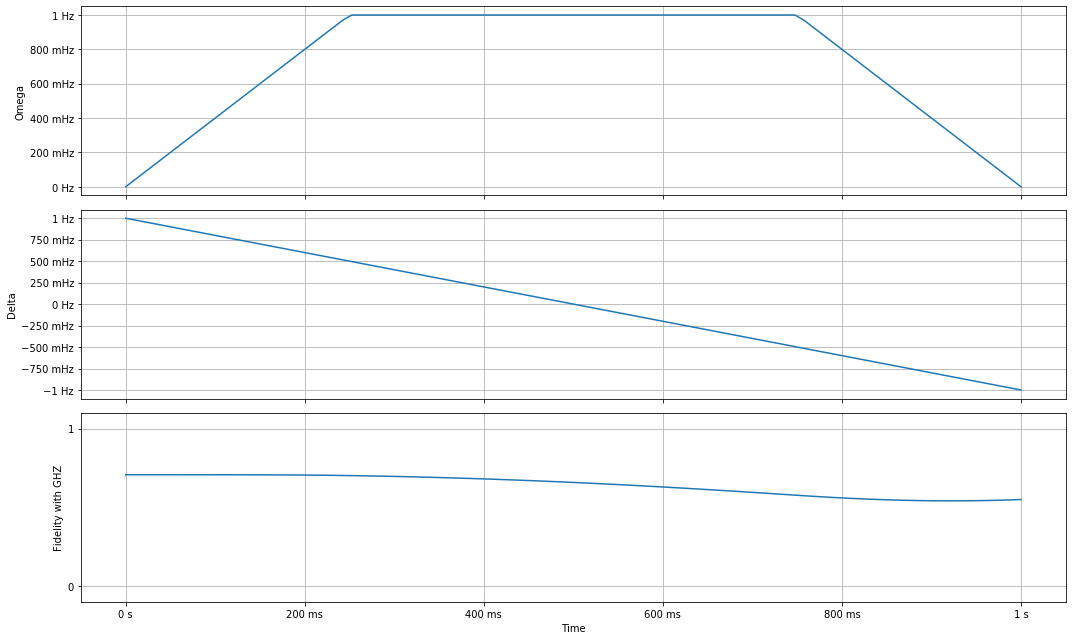

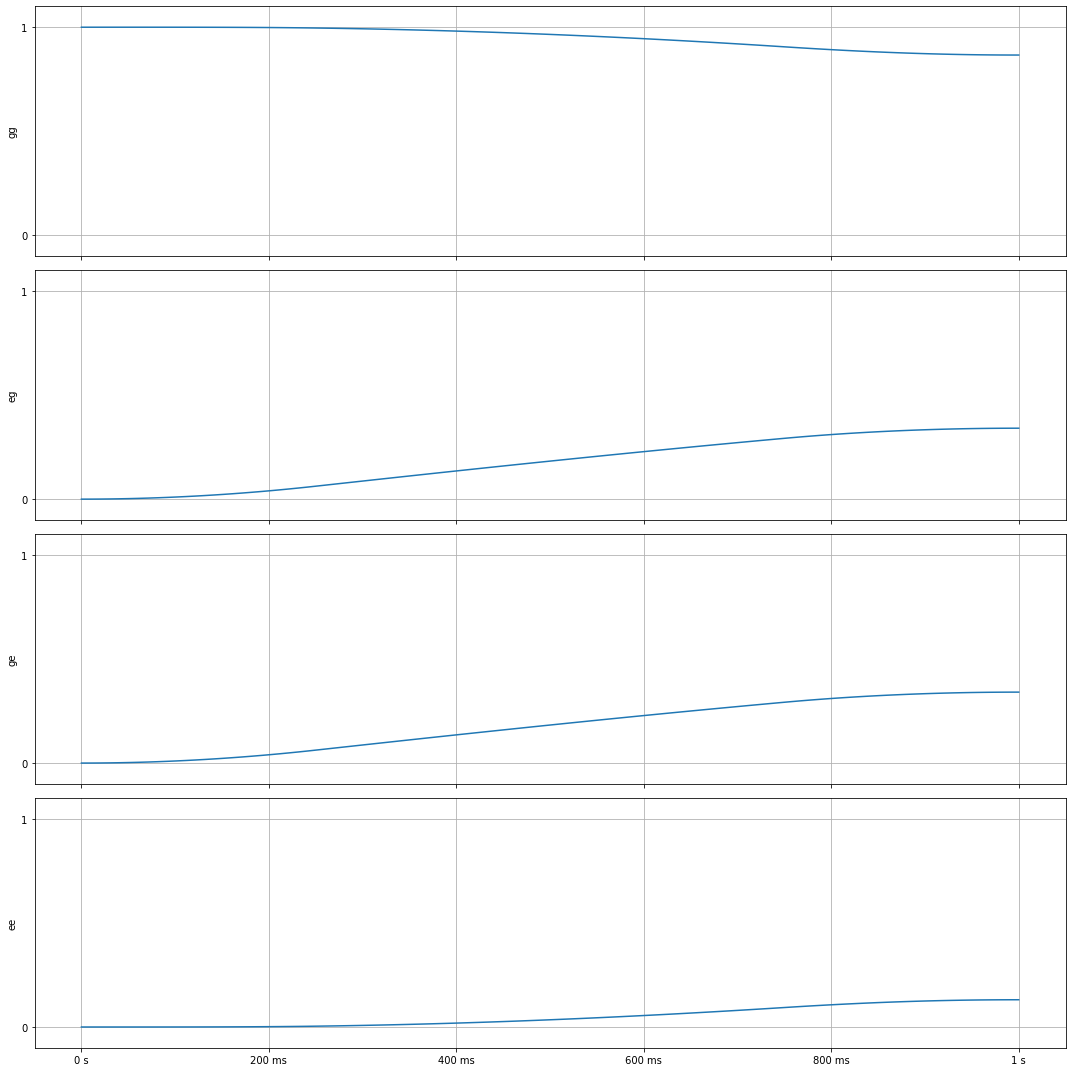

In [8]:
t = 1
N = 2
e_qs = EvolvingQubitSystem(
    N=N, V=1, geometry=RegularLattice1D(),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 4, t * 3 / 4, t], [0, 1, 1, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1, -1]),
    t_list=np.linspace(0, 1, 100),
    ghz_state=get_ghz_state(N)
)
e_qs.solve()
e_qs.plot()


Evolving 4-qubit system.

State evolution with values for $\Omega$ and $\Delta$ transcribed from paper.

Paper contains additional detuning fields specifically on edge-qubits, which are not applied here.
Hence, non-optimal performance is expected.
However, system does show significantly good performance w.r.t. fidelity gained.


no collapse operator, using sesolve


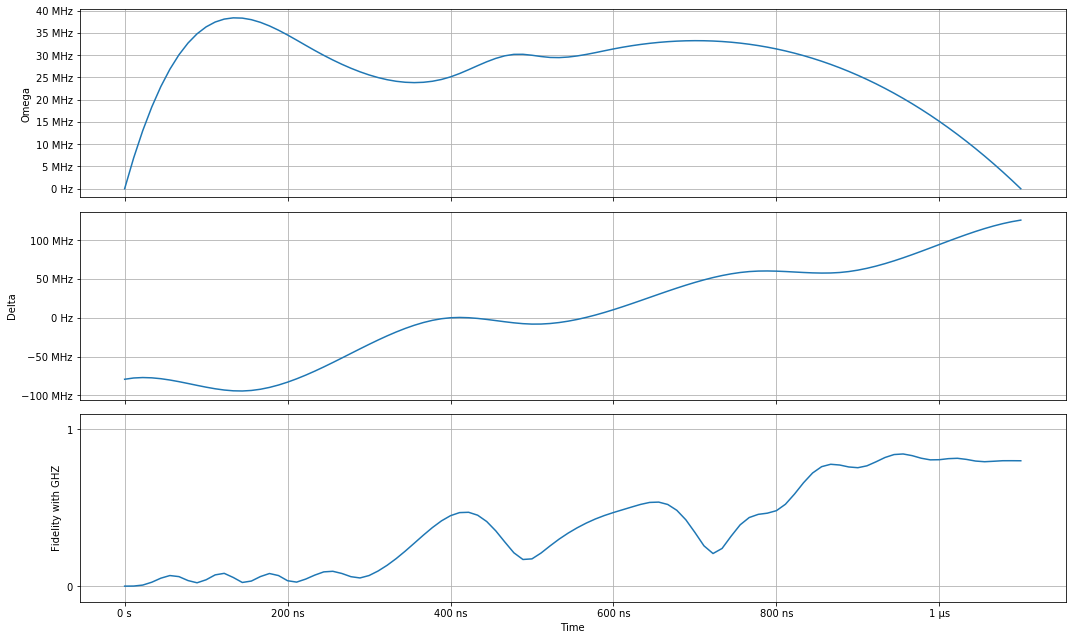

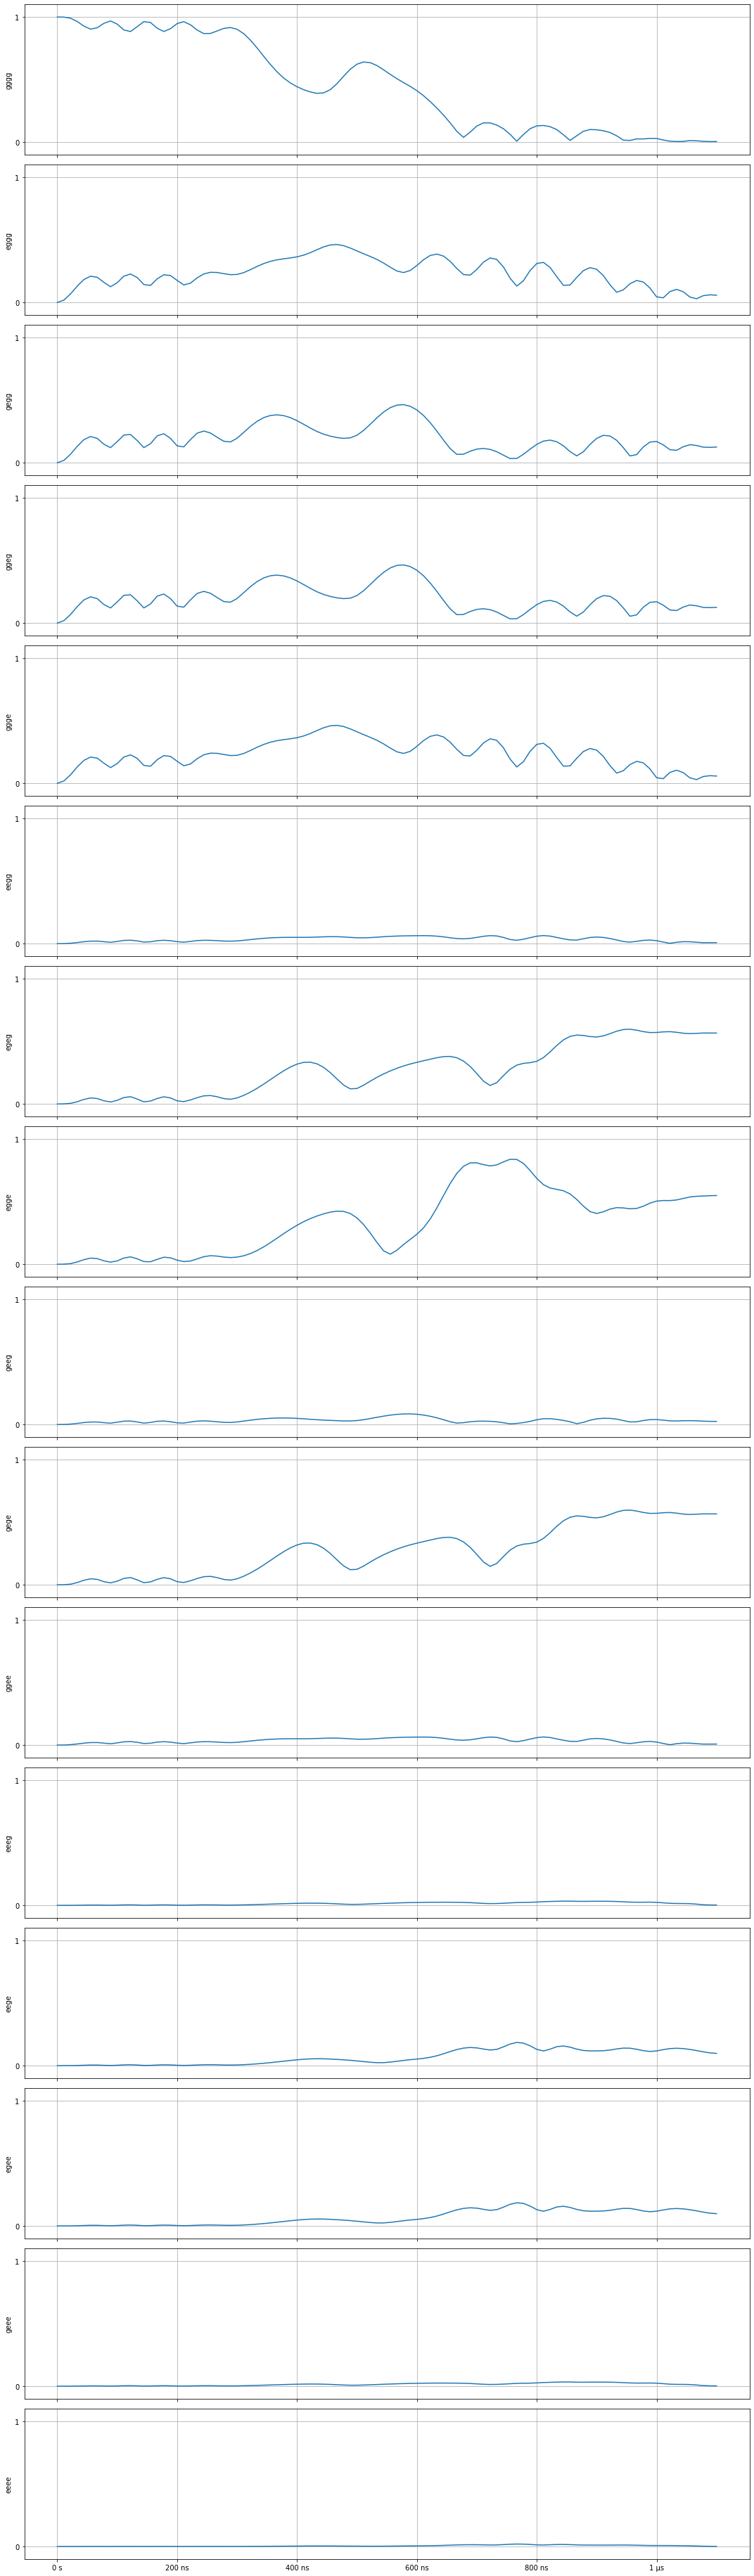

In [16]:
t = 1
N = 4
e_qs = EvolvingQubitSystem(
    N=N, V=paper_data.V, geometry=RegularLattice1D(),
    Omega=paper_data.get_hamiltonian_coeff_fn(paper_data.Omega, N),
    Delta=paper_data.get_hamiltonian_coeff_fn(paper_data.Delta, N),
    t_list=np.linspace(0, 1.1e-6, 100),
    ghz_state=get_ghz_state(N, _type=GHZStateType.ALTERNATING)
)
e_qs.solve()
e_qs.plot()
